# Installing and Importing

In [1]:
# Install necessary packages
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor

/tmp/ipykernel_61687/68418150.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Transformers
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = self.encoder.transform(X_copy[self.columns])
        return X_copy

class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column):
        self.target_column = target_column
        self.encoder = LabelEncoder()

    def fit(self, y, **fit_params):
        self.encoder.fit(y)
        return self

    def transform(self, y):
        return self.encoder.transform(y)

class StandardScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = self.scaler.transform(X_copy[self.columns])
        return X_copy


In [4]:
Churn_train_df=pd.read_csv('../Data/Raw-Data/churn-bigml-80.csv')

# EDA

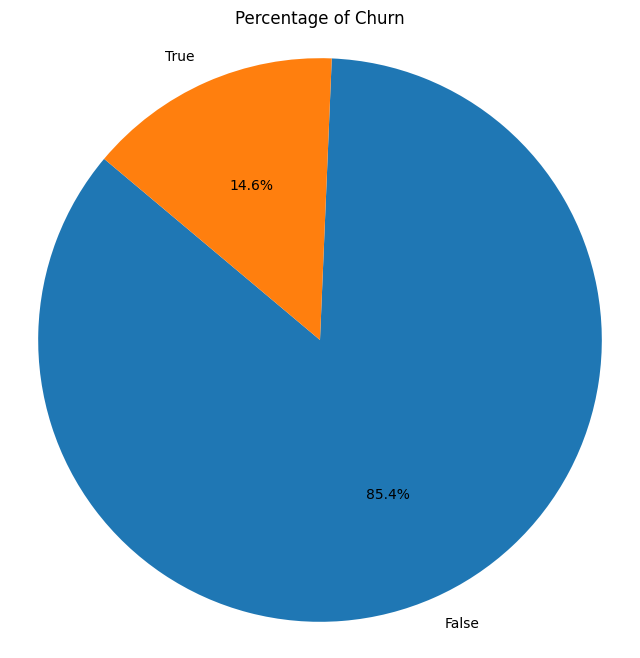

In [5]:
percentage_churn = Churn_train_df["Churn"].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(percentage_churn, labels=percentage_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churn')
plt.axis('equal')
plt.show()



In [6]:
Churn_train_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
Churn_train_df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
Churn_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [9]:
Churn_train_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [10]:
Churn_train_df.describe(exclude=np.number).T

,count,unique,top,freq
State,2666,51,WV,88
International plan,2666,2,No,2396
Voice mail plan,2666,2,No,1933
Churn,2666,2,False,2278


In [11]:
Churn_train_df['Churn'] = Churn_train_df['Churn'].astype('category')
Churn_train_df['State'] = Churn_train_df['State'].astype('category')
Churn_train_df['International plan'] = Churn_train_df['International plan'].astype('category')
Churn_train_df['Voice mail plan'] = Churn_train_df['Voice mail plan'].astype('category')

### Histplot for Numarical Features

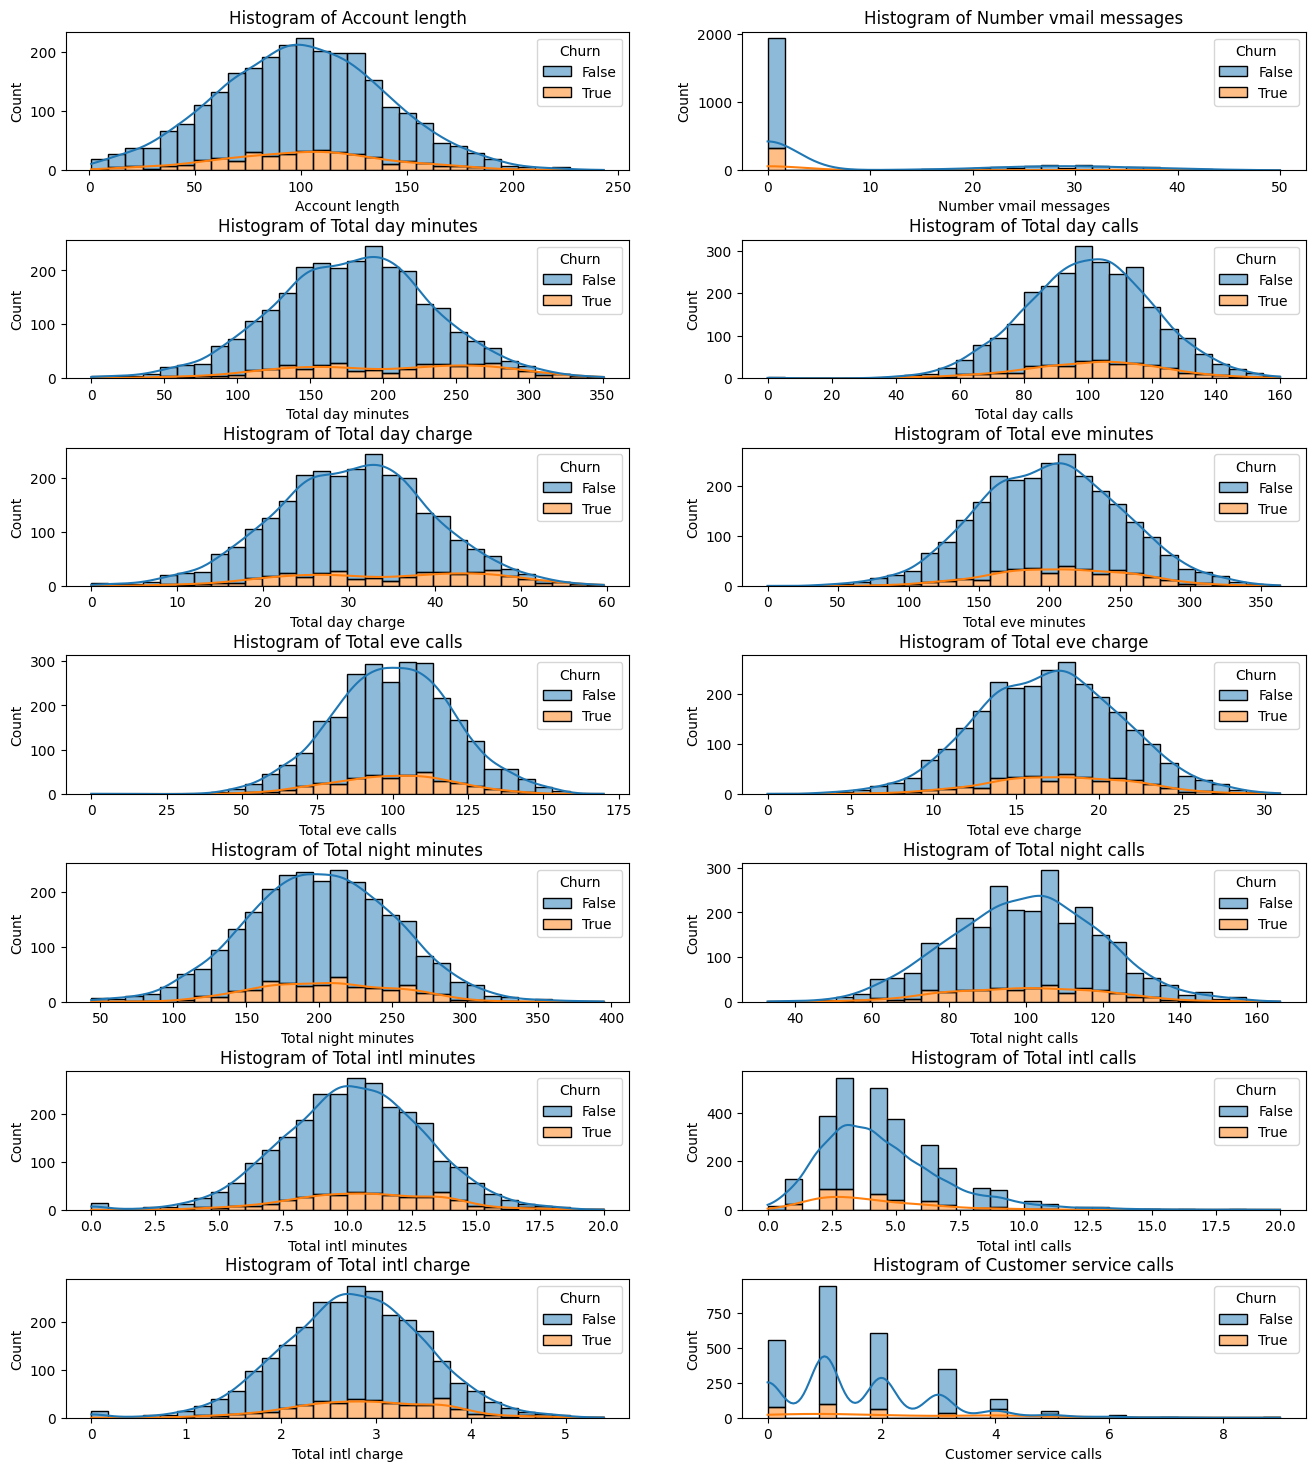

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Account length', 'Number vmail messages', 'Total day minutes', 
            'Total day calls', 'Total day charge', 'Total eve minutes', 
            'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total intl minutes', 
            'Total intl calls', 'Total intl charge', 'Customer service calls']



# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms with different colors for 'Churn' status
for i, feature in enumerate(features):
    sns.histplot(data=Churn_train_df, x=feature, bins=30, kde=True, multiple="stack", ax=axes[i],hue='Churn')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)

plt.show()


### Count Plots for Categorical Features

In [13]:
print(pd.crosstab(Churn_train_df["Churn"], Churn_train_df['International plan'], margins=True).T)


Churn               False  True   All
International plan                   
No                   2126   270  2396
Yes                   152   118   270
All                  2278   388  2666


In [14]:
print(pd.crosstab(Churn_train_df["Churn"], Churn_train_df['Voice mail plan'], margins=True).T)


Churn            False  True   All
Voice mail plan                   
No                1610   323  1933
Yes                668    65   733
All               2278   388  2666


In [15]:
print(pd.crosstab(Churn_train_df["Churn"], Churn_train_df['State'], margins=True).T)

Churn  False  True   All
State                   
AK        40     3    43
AL        59     7    66
AR        36    11    47
AZ        42     3    45
CA        19     5    24
CO        52     7    59
CT        48    11    59
DC        40     5    45
DE        43     8    51
FL        47     7    54
GA        41     8    49
HI        42     2    44
IA        35     3    38
ID        51     5    56
IL        41     4    45
IN        48     6    54
KS        42    10    52
KY        37     6    43
LA        32     3    35
MA        44     8    52
MD        46    14    60
ME        38    11    49
MI        45    13    58
MN        57    13    70
MO        46     5    51
MS        37    11    48
MT        43    10    53
NC        47     9    56
ND        40     4    44
NE        41     4    45
NH        34     9    43
NJ        36    14    50
NM        40     4    44
NV        48    13    61
NY        56    12    68
OH        56    10    66
OK        45     7    52
OR        55     7    62


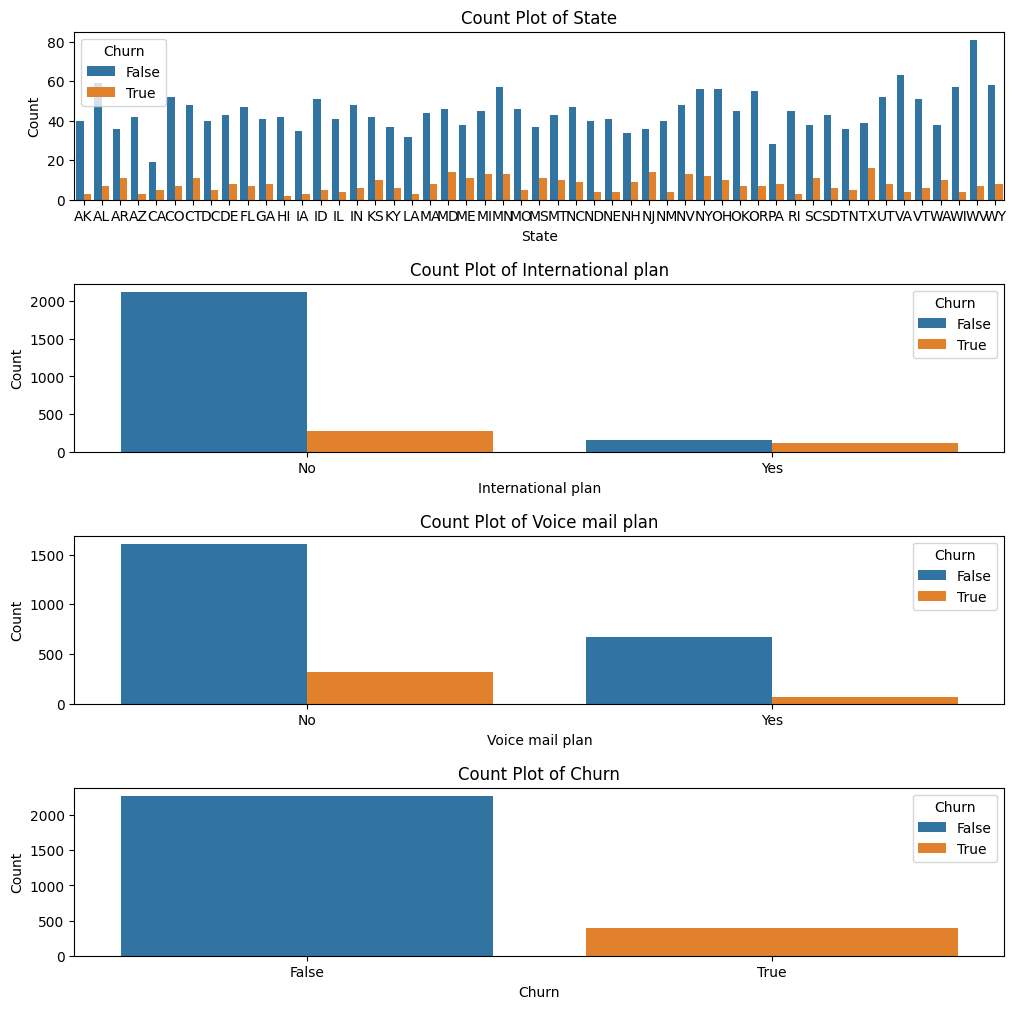

In [16]:
categorical_features = ['State', 'International plan', 'Voice mail plan', 'Churn']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(data=Churn_train_df, x=feature, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.show()


In [17]:
# Create transformers
ordinal_encoder_transformer = OrdinalEncoderTransformer(columns=['State', 'International plan','Voice mail plan'])
label_encoder_transformer = LabelEncoderTransformer(target_column='Churn')

In [18]:
# Transform the training set
Churn_train_df_labels = label_encoder_transformer.fit_transform(Churn_train_df['Churn'])
Churn_train_df_features = ordinal_encoder_transformer.fit_transform(Churn_train_df.drop(columns='Churn'))

# Concatenate the labels and features back together
Churn_train_df_transformed = pd.concat([pd.Series(Churn_train_df_labels, name='Churn'), pd.DataFrame(Churn_train_df_features)], axis=1)


In [19]:
Churn_train_df_transformed["Churn"].mean()

0.145536384096024

In [20]:
Churn_train_df_transformed[Churn_train_df_transformed["Churn"] == 1].mean()

Churn                       1.000000
State                      26.051546
Account length            102.319588
Area code                 437.543814
International plan          0.304124
Voice mail plan             0.167526
Number vmail messages       5.170103
Total day minutes         205.181186
Total day calls           101.195876
Total day charge           34.881340
Total eve minutes         209.385309
Total eve calls            99.948454
Total eve charge           17.797861
Total night minutes       205.307216
Total night calls         100.682990
Total night charge          9.238892
Total intl minutes         10.819330
Total intl calls            4.051546
Total intl charge           2.921727
Customer service calls      2.206186
dtype: float64

In [21]:
Churn_train_df_transformed[Churn_train_df_transformed["Churn"] == 0].mean()

Churn                       0.000000
State                      26.033363
Account length            100.330992
Area code                 437.420983
International plan          0.066725
Voice mail plan             0.293240
Number vmail messages       8.507463
Total day minutes         175.104346
Total day calls           100.159350
Total day charge           29.768266
Total eve minutes         198.853380
Total eve calls           100.036435
Total eve charge           16.902809
Total night minutes       200.464091
Total night calls         100.007902
Total night charge          9.020975
Total intl minutes         10.137840
Total intl calls            4.538191
Total intl charge           2.737709
Customer service calls      1.453029
dtype: float64

In [22]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

Churn_train_df_transformed.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

/tmp/ipykernel_61687/2774573079.py:3: FutureWarning: The provided callable <function mean at 0x7f531c1307c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Churn_train_df_transformed.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
/tmp/ipykernel_61687/2774573079.py:3: FutureWarning: The provided callable <function std at 0x7f531c130900> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  Churn_train_df_transformed.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
/tmp/ipykernel_61687/2774573079.py:3: FutureWarning: The provided callable <function min at 0x7f531c113ec0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep cur

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
0            175.104346  50.105334  0.0  313.8        198.853380  50.818954   
1            205.181186  68.490213  0.0  350.8        209.385309  50.863718   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
0       0.0  354.2          200.464091  51.284496  43.7  395.0  
1      70.9  363.7          205.307216  47.565157  47.4  354.9

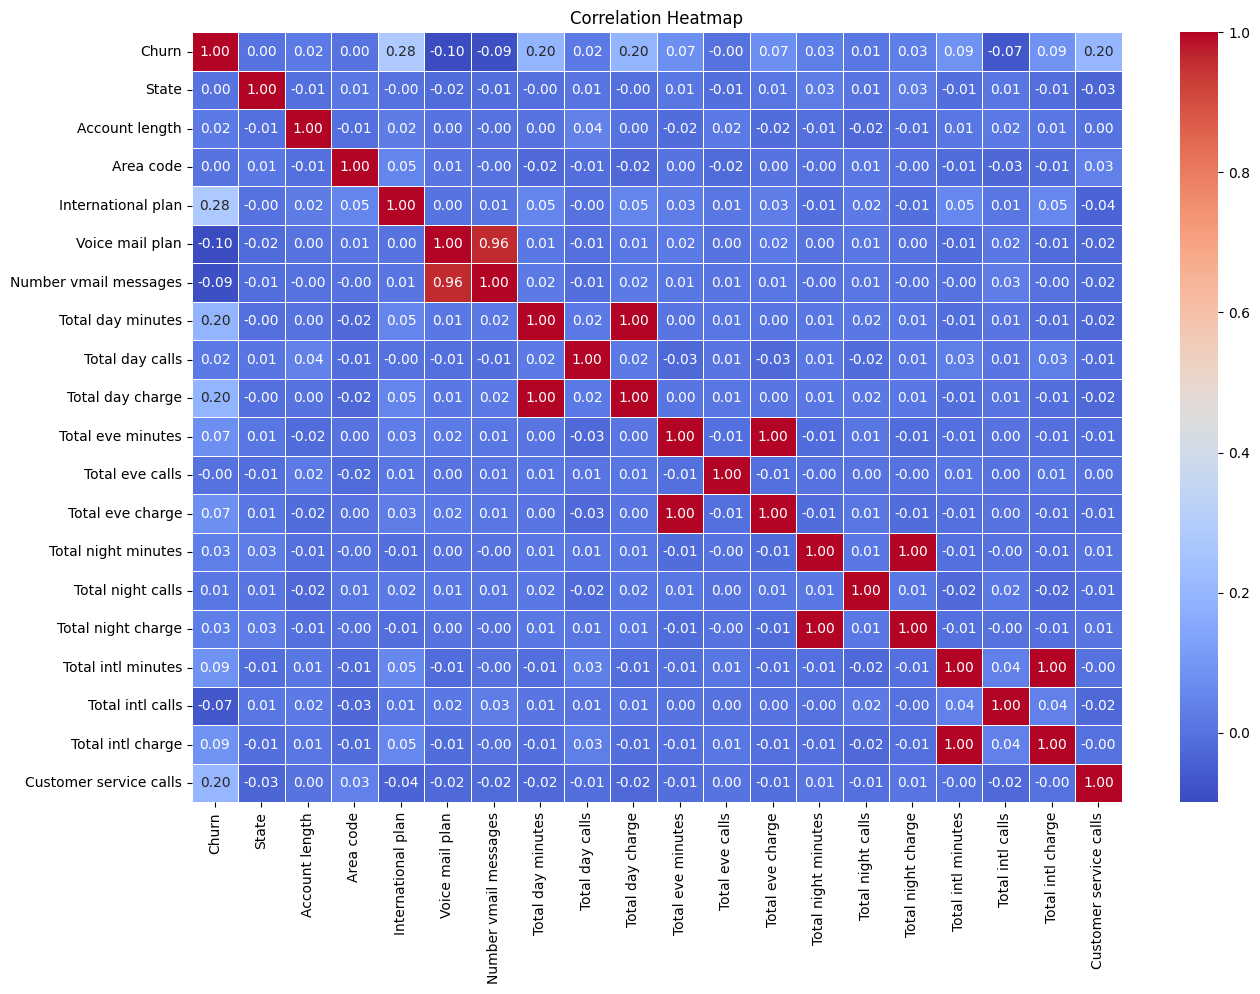

In [23]:
correlation_matrix = Churn_train_df_transformed.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
Churn_train_df = Churn_train_df.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes','Number vmail messages','Total day charge'])

# Dataset Making

# Data Cleaning Without Feature Engineering

In [25]:
Churn_train_df = pd.read_csv('../Data/Raw-Data/churn-bigml-80.csv')
Churn_validation_df = pd.read_csv('../Data/Raw-Data/churn-bigml-20.csv')

Separating features and target variable in the train set

In [26]:
X_train = Churn_train_df.drop(columns=['Churn'])
y_train = Churn_train_df['Churn']

Creating the transformers

In [27]:
ordinal_encoder_transformer = OrdinalEncoderTransformer(columns=['State', 'International plan','Voice mail plan'])
label_encoder_transformer = LabelEncoderTransformer(target_column='Churn')

Fiting and transforming the training set

In [28]:
X_train_transformed = ordinal_encoder_transformer.fit_transform(X_train)
y_train_transformed = label_encoder_transformer.fit_transform(y_train)

Converting transformed arrays to DataFrames

In [29]:
y_train_df = pd.DataFrame({'Churn': y_train_transformed})
X_train_scaled_df = pd.DataFrame(X_train_transformed, columns=X_train_transformed.columns)

Saving clean data

In [30]:
X_train_scaled_df.to_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/X_train.csv',index=False)
y_train_df.to_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/y_train.csv',index=False)

## Validation Data

Separating features and target variable in the validation set

In [31]:
X_validation = Churn_validation_df.drop(columns=['Churn'])
y_validation = Churn_validation_df['Churn']

Only Transforming the validation set

In [32]:
X_validation_transformed = ordinal_encoder_transformer.transform(X_validation)
y_validation_transformed = label_encoder_transformer.transform(y_validation)

Converting transformed arrays to DataFrames

In [33]:
y_validation_df = pd.DataFrame({'Churn': y_validation_transformed})
X_validation_scaled_df = pd.DataFrame(X_validation_transformed, columns=X_validation_transformed.columns)

Saving clean data

In [34]:
X_validation_scaled_df.to_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/X_validation.csv', index=False)
y_validation_df.to_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/y_validation.csv', index=False)

# Feature Engineering

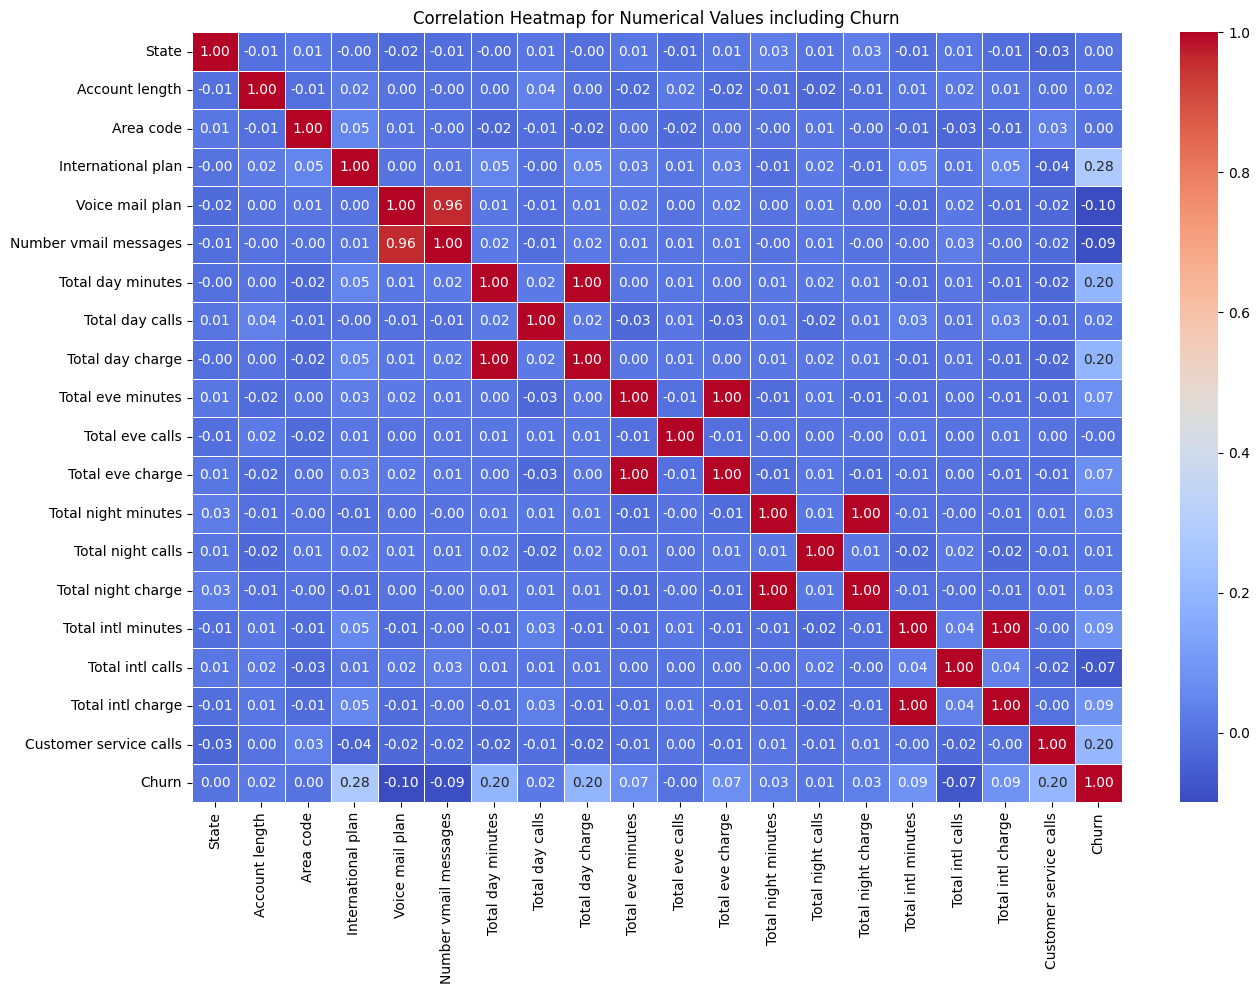

In [35]:
numerical_columns = X_train_scaled_df.select_dtypes(include='number')

numerical_columns['Churn'] = y_train_df['Churn']

correlation_matrix = numerical_columns.corr('pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Numerical Values including Churn")
plt.show()

Creating New Feature

In [36]:
Churn_train_df['Total charge'] =  Churn_train_df['Total day charge'] + Churn_train_df['Total eve charge'] + Churn_train_df['Total night charge'] + Churn_train_df['Total intl charge']
Churn_validation_df['Total charge'] = Churn_validation_df['Total day charge'] + Churn_validation_df['Total eve charge'] + Churn_validation_df['Total night charge'] + Churn_validation_df['Total intl charge']

In [37]:
Churn_train_df = Churn_train_df.drop(columns=['Total intl charge', 'Total night charge', 'Total day charge', 'Total eve charge'])
Churn_validation_df = Churn_validation_df.drop(columns=['Total intl charge', 'Total night charge', 'Total day charge', 'Total eve charge'])

In [38]:
# Churn_train_df['Total calls'] = Churn_train_df['Total day calls'] + Churn_train_df['Total eve calls'] + Churn_train_df['Total night calls'] + Churn_train_df['Total intl calls']
# Churn_validation_df['Total calls'] = Churn_validation_df['Total day calls'] + Churn_validation_df['Total eve calls'] + Churn_validation_df['Total night calls'] + Churn_validation_df['Total intl calls']

In [39]:
X_train = Churn_train_df.drop(columns=['Churn'])
y_train = Churn_train_df['Churn']

In [40]:
# Creating the transformers
ordinal_encoder_transformer = OrdinalEncoderTransformer(columns=['State', 'International plan','Voice mail plan'])
label_encoder_transformer = LabelEncoderTransformer(target_column='Churn')

In [41]:
# Fitting and transforming the training set
X_train_transformed = ordinal_encoder_transformer.fit_transform(X_train)
y_train_transformed = label_encoder_transformer.fit_transform(y_train)

In [42]:
# Appling SMOTE to handle class imbalance
smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train_transformed)

In [43]:
# Converting transformed arrays to DataFrames
y_train_df = pd.DataFrame({'Churn': y_train_resampled})
X_train_scaled_df = pd.DataFrame(X_train_resampled, columns=X_train_resampled.columns)

X_train_scaled_df.to_csv('../Data/Clean-Data/Dataset_with_feature_engineering/X_train.csv',index=False)
y_train_df.to_csv('../Data/Clean-Data/Dataset_with_feature_engineering/y_train.csv',index=False)

## Validation Data

Separating features and target variable in the validation set

In [44]:
X_validation = Churn_validation_df.drop(columns=['Churn'])
y_validation = Churn_validation_df['Churn']

Only Transforming the validation set

In [45]:
X_validation_transformed = ordinal_encoder_transformer.transform(X_validation)
y_validation_transformed = label_encoder_transformer.transform(y_validation)

Converting transformed arrays to DataFrames

In [46]:
# Converting transformed arrays to DataFrames for validation set
y_validation_df = pd.DataFrame({'Churn': y_validation_transformed})
X_validation_scaled_df = pd.DataFrame(X_validation_transformed, columns=X_validation_transformed.columns)

Saving clean data

In [47]:
# Saving clean data for validation set
X_validation_scaled_df.to_csv('../Data/Clean-Data/Dataset_with_feature_engineering/X_validation.csv', index=False)
y_validation_df.to_csv('../Data/Clean-Data/Dataset_with_feature_engineering/y_validation.csv', index=False)

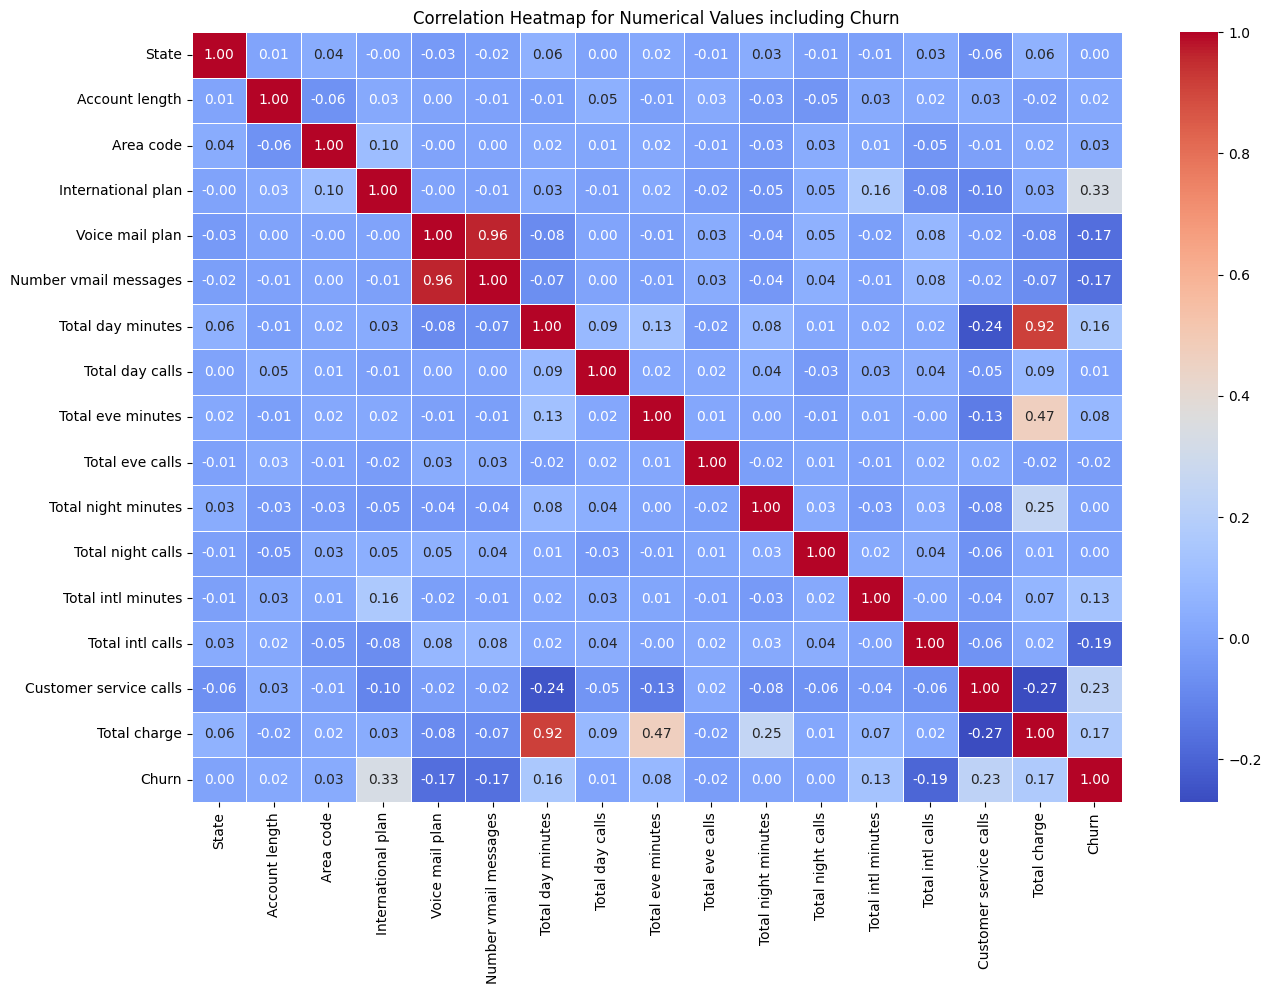

In [48]:
numerical_columns = X_train_scaled_df.select_dtypes(include='number')

numerical_columns['Churn'] = y_train_df['Churn']

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Numerical Values including Churn")
plt.show()